# EDA on Data of Movies and TV Shows on Amazon 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data into Pandas Data Frame

In [4]:
title_df=pd.read_csv('amazon_prime_titles.csv')

In [4]:
title_df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."
9667,s9668,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",NaN,NaN,2010,R,103 min,"Action, Drama, Suspense","Harry Brown, starring two-time Academy Award w..."


In [5]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [6]:
title_df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
title_df.isnull().sum().sum()

22162

As we can see here,a total of 22162 values are missing accross different columns out of which a huge fraction of data for 'date_added' column and 'country' is missing but to further enhance upon it, for a better visulaization we shall add a heatmap

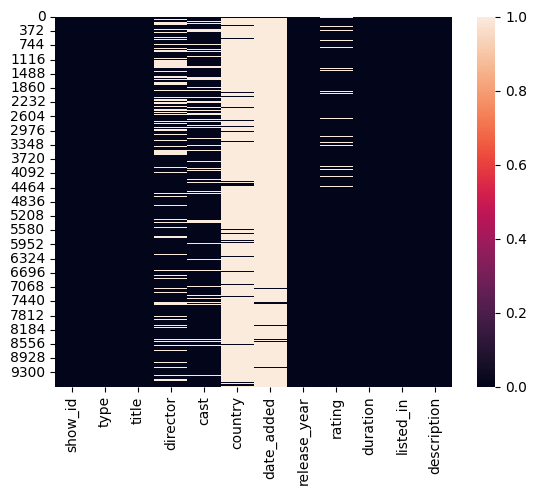

In [8]:
sns.heatmap(title_df.isnull());

In [6]:
title_df.nunique()

show_id         9668
type               2
title           9668
director        5774
cast            7928
country           87
date_added        85
release_year     100
rating            25
duration         219
listed_in        518
description     9414
dtype: int64

## Handeling null vlaues

In [5]:
title_df.director.fillna('Data Unavailable',inplace=True)
title_df.cast.fillna('Data Unavailable',inplace=True)
title_df.rating.fillna('Data Unavailable',inplace=True)
title_df.country.fillna('Data Unavailable',inplace=True)
title_df.date_added.fillna('Data Unavailable',inplace=True)

In [11]:
title_df.isnull().values.any()

False

Therefore we've filled most of the NAN vlaues.

### T.V. Shows v/s Movies
With the help of the data available, let's analyze which kind of content does Amazon focuses more on, Movies or T.v. Shows

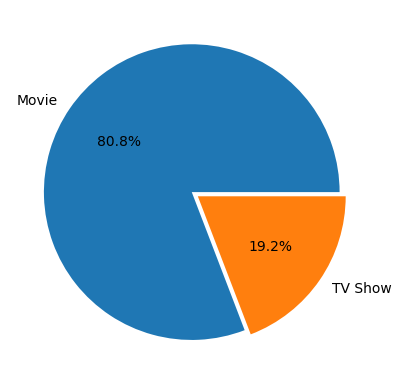

In [12]:
plt.pie(title_df.type.value_counts(),labels=list(title_df.type.unique()),explode=(0.025,0.025),autopct='%1.1f%%');

Clearly,we can see that proportion of Movies that are present on the platform is more than that of TV Shows

### Analysis of Tv Shows and Movies
So we start of by analysing different type of Movies and T.V.Shows present on Amazon Prime.

Here,we create seperate dataset for Movies and TV shows

In [7]:
movies_df=title_df[title_df['type']=='Movie'].copy()
show_df=title_df[title_df['type']=='TV Show'].copy()
movies_df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3933,s3934,Movie,Afflicted,"Derek Lee, Clif Prowse","Clif Prowse, Derek Lee, Baya Rehaz, Jason Lee,...",Data Unavailable,Data Unavailable,2014,R,86 min,"Horror, Suspense",This terrifying horror thriller follows two be...
6118,s6119,Movie,Molokai: The Story Of Father Damien,Paul Cox,"David Wenham, Sam Neill, Kris Kristofferson, P...",Data Unavailable,Data Unavailable,1999,PG,122 min,Drama,"The touching story of Father Damien, who went ..."
2290,s2291,Movie,Greenfingers,Joel Hershman,"Helen Mirren, Clive Owen, David Kelly, Warren ...",Data Unavailable,Data Unavailable,2001,R,91 min,"Comedy, Drama, Romance",Inmate Colin Briggs (Clive Owen) is introduced...
7053,s7054,Movie,A Bucket Of Blood,Roger Corman,"Dick Miller, Barboura Morris, Antony Carbone, ...",Data Unavailable,Data Unavailable,1959,13+,65 min,"Comedy, Drama","A dim-witted busboy, Walter Paisley (Dick Mill..."
3829,s3830,Movie,Left Behind: World at War,Craig R. Baxley,"Kirk Cameron, Lou Gossett Jr., Brad Johnson, G...",Data Unavailable,Data Unavailable,2005,PG-13,95 min,"Action, Drama, Faith and Spirituality",Based on the New York Times best-selling novel...
8619,s8620,Movie,They Fought for Their Land,Sergey Bondarchuk,"Vasiliy Shukshin, Vyacheslav Tikhonov, Sergey ...",Data Unavailable,Data Unavailable,1975,16+,151 min,"Action, Drama","In July 1942 on the outskirts of Stalingrad, b..."
5484,s5485,Movie,Timelock,Robert Munic,"Maryam d'Abo, Arye Gross, Jeffrey Meek",Data Unavailable,Data Unavailable,1996,18+,96 min,"Action, Science Fiction","In the 23rd century, a penal colony in a dista..."
8672,s8673,Movie,Narasimhapuram,Sri Raj Balla,"Siri, Nanda, Ranga, Geetha, Bangar Raju",Data Unavailable,Data Unavailable,2021,18+,111 min,"Action, Drama",Siri (Siri Hanumanth of Big Boss Season 5 fame...
7206,s7207,Movie,Cartoon Classics - Vol. 1: 25 Favorite Cartoon...,"Max Fleischer, Tex Avery","Bugs Bunny, Daffy Duck, Porky Pig, Little Lulu...",Data Unavailable,Data Unavailable,2017,13+,175 min,"Animation, Special Interest",Enjoy 3 hours of Classic Cartoons from the Gol...
3818,s3819,Movie,Manikarnika: The Queen of Jhansi,"Radha Krishna Jagarlamundi, Kangana Ranaut","Kangana Ranaut, Jisshu Sengupta, Ankita Lokhande",Data Unavailable,Data Unavailable,2019,16+,141 min,"Action, Drama, Historical",Manikarnika – Queen of Jhansi or well known as...


As we can see that 'listed_in' column containes a single string for each entry.So we instead we convert it in such a way that it only contain one type in 'listed_in' section,which can later allow us an easy counting process.

In [9]:
genre=movies_df.set_index('show_id').listed_in.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
genre_tv=show_df.set_index('show_id').listed_in.str.split(',',expand=True).stack().reset_index(level=1,drop=True)

In [10]:
genre_tv.unique()

array(['Kids', ' Special Interest', 'Comedy', ' Talk Show and Variety',
       'Action', ' Anime', ' Comedy', 'TV Shows', ' Drama', 'Animation',
       ' Fantasy', ' Adventure', ' Animation', 'Anime', ' Kids', 'Drama',
       ' Suspense', 'Fitness', 'Arts', ' Entertainment', ' and Culture',
       ' Western', 'Documentary', ' Science Fiction', 'Adventure',
       ' Romance', ' Unscripted', 'Unscripted', ' Military and War',
       ' Documentary', 'Sports', ' International', 'Suspense',
       'Special Interest', ' Sports', 'Horror', ' LGBTQ', 'Fantasy',
       ' Horror', ' Young Adult Audience', 'International',
       ' Music Videos and Concerts', ' Faith and Spirituality',
       ' Historical', 'Romance', 'Science Fiction',
       'Young Adult Audience', 'Arthouse', ' Arts',
       'Talk Show and Variety', 'LGBTQ', 'Music Videos and Concerts',
       'Western', 'Faith and Spirituality'], dtype=object)

upon a closer look we might find that the type 'Drama' and ' Drama' have appeared twice here

In [11]:
genre.replace(' Drama','Drama',inplace=True)
genre_tv.replace(' Drama','Drama',inplace=True)
genre_tv.unique()

array(['Kids', ' Special Interest', 'Comedy', ' Talk Show and Variety',
       'Action', ' Anime', ' Comedy', 'TV Shows', 'Drama', 'Animation',
       ' Fantasy', ' Adventure', ' Animation', 'Anime', ' Kids',
       ' Suspense', 'Fitness', 'Arts', ' Entertainment', ' and Culture',
       ' Western', 'Documentary', ' Science Fiction', 'Adventure',
       ' Romance', ' Unscripted', 'Unscripted', ' Military and War',
       ' Documentary', 'Sports', ' International', 'Suspense',
       'Special Interest', ' Sports', 'Horror', ' LGBTQ', 'Fantasy',
       ' Horror', ' Young Adult Audience', 'International',
       ' Music Videos and Concerts', ' Faith and Spirituality',
       ' Historical', 'Romance', 'Science Fiction',
       'Young Adult Audience', 'Arthouse', ' Arts',
       'Talk Show and Variety', 'LGBTQ', 'Music Videos and Concerts',
       'Western', 'Faith and Spirituality'], dtype=object)

Having fixed it, we shall now move on to some relevent plots.

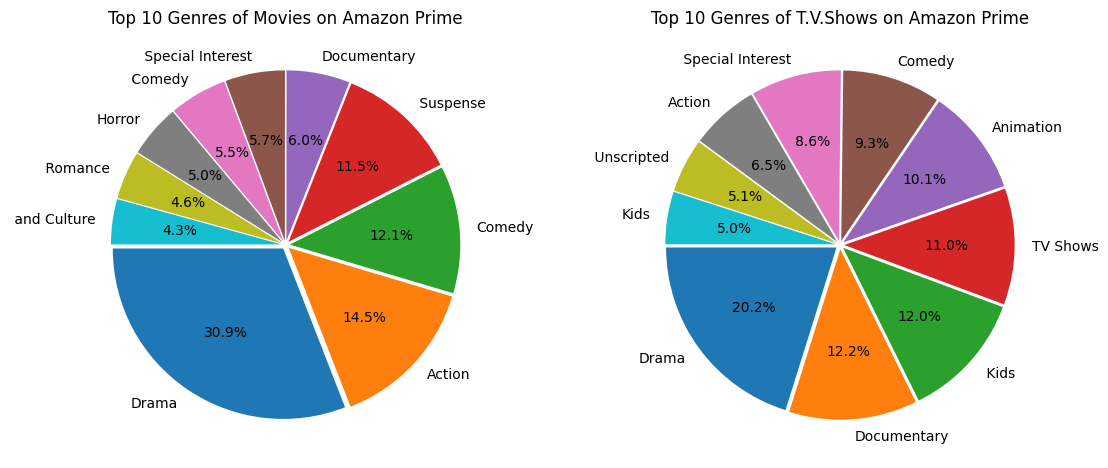

In [12]:
expl=[0.025]*10
fig,ax= plt.subplots(1,2,figsize=(12,6))
ax[0].set_title('Top 10 Genres of Movies on Amazon Prime')
ax[0].pie(genre.value_counts().head(10),labels=list(genre.value_counts().head(10).index),explode=expl,startangle=180,autopct='%1.1f%%');
ax[1].set_title('Top 10 Genres of T.V.Shows on Amazon Prime')
ax[1].pie(genre_tv.value_counts().head(10),labels=list(genre_tv.value_counts().head(10).index),explode=expl,startangle=180,autopct='%1.1f%%');
plt.tight_layout(pad=4)

##### Therefore we can easily come up with the conclusion that Drama is prevelent genre accross Movies and T.v.Shows

### Directors on Amazon Prime

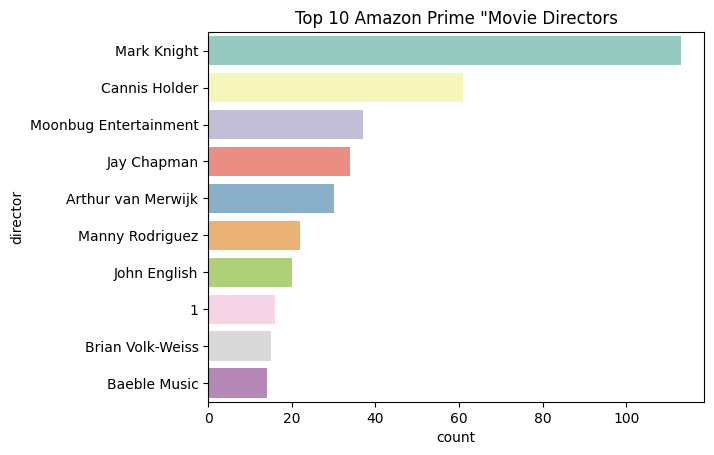

In [13]:
directors_m=movies_df[movies_df.director!='Data Unavailable'].director
sns.countplot(y=directors_m,order=directors_m.value_counts().index[:10],palette='Set3');
plt.title('Top 10 Amazon Prime "Movie Directors');


### Ratings of Movies on Amazon Prime

In [19]:
title_df[title_df!='Data Unavailable'].rating.unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

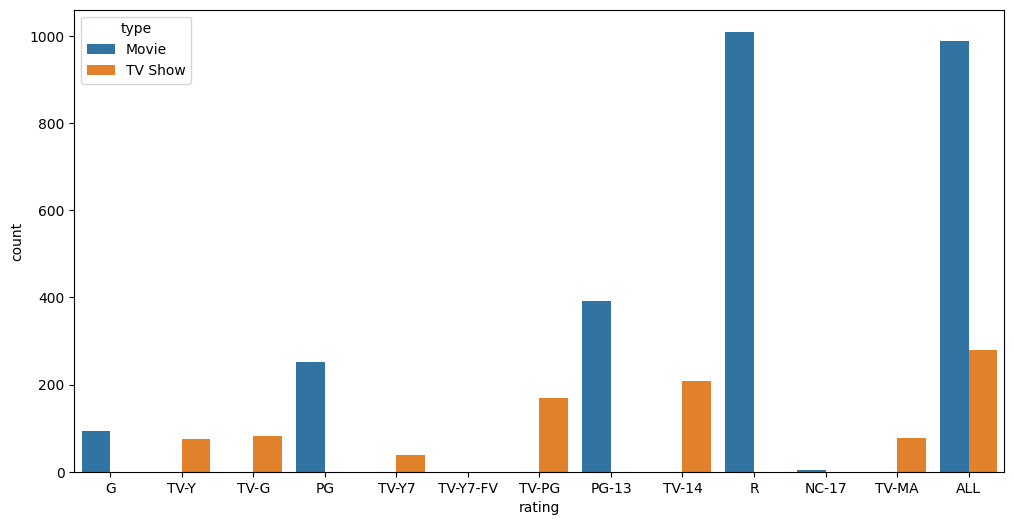

In [20]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA','ALL']
plt.figure(figsize=(12,6))
sns.countplot(x=title_df.rating,hue=title_df.type,order=order);

Text(0.5, 1.0, 'Ratings of T.V.Shows')

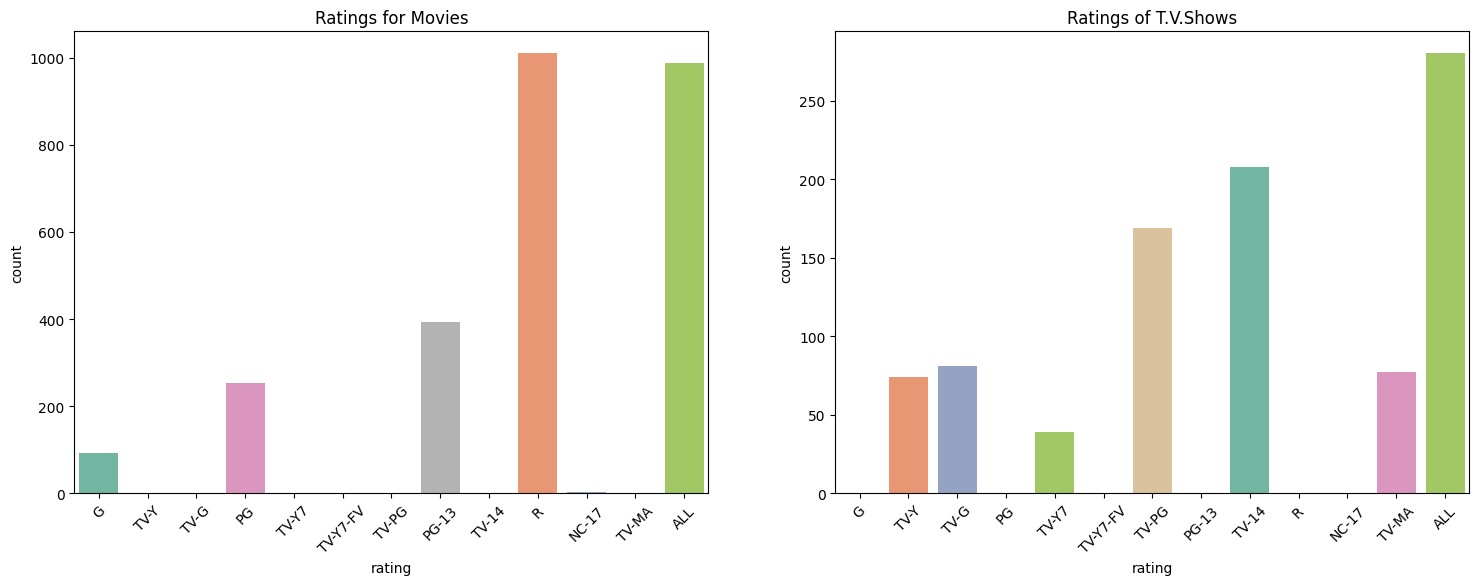

In [21]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
f1=sns.countplot(x='rating',data=movies_df,ax=ax[0],palette='Set2',order=order)
f1.set_title("Ratings for Movies")
f1.set_xticklabels(f1.get_xticklabels(),rotation=45)
f2=sns.countplot(x='rating',data=show_df,ax=ax[1],palette='Set2',order=order)
f2.set_xticklabels(f2.get_xticklabels(),rotation=45)
f2.set_title('Ratings of T.V.Shows')

### Duration of content

In [22]:
title_df.duration.sample(5)

6136      91 min
8112      92 min
417     1 Season
6862      91 min
8473    1 Season
Name: duration, dtype: object

In [23]:
show_df.duration.unique()

array(['1 Season', '3 Seasons', '2 Seasons', '4 Seasons', '7 Seasons',
       '9 Seasons', '6 Seasons', '5 Seasons', '29 Seasons', '19 Seasons',
       '21 Seasons', '8 Seasons', '12 Seasons', '11 Seasons',
       '10 Seasons', '14 Seasons', '15 Seasons'], dtype=object)

Clearly we can see that the duration for Movies is given in minutes while for T.V.Shows it's in seasons.However,in order to plot relevent figures we need to change it to int values.

In [14]:
movies_df.duration=movies_df.duration.str.replace(' min','').astype(int)
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,Data Unavailable,113,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,Data Unavailable,74,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,Data Unavailable,69,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,Data Unavailable,45,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9660,s9661,Movie,The Man in the Hat,"John-Paul Davidson, Stephen Warbeck","Ciaran Hinds, Stephen Dillane, Maïwenn",Data Unavailable,Data Unavailable,2021,13+,96,Comedy,The Man in the Hat journeys through France in ...
9662,s9663,Movie,River,Emily Skye,"Mary Cameron Rogers, Alexandra Rose, Rob Marsh...",Data Unavailable,Data Unavailable,2021,16+,93,"Drama, Science Fiction, Suspense","River is a grounded Sci-Fi mystery Thriller, t..."
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",Data Unavailable,Data Unavailable,1940,7+,60,Comedy,New York City street principles get an East Si...
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",Data Unavailable,Data Unavailable,2008,R,90,Action,"In war-torn Eastern Europe, a world-weary grou..."


In [72]:
movies_df.duration

0       113
1       110
2        74
3        69
4        45
       ... 
9660     96
9662     93
9663     60
9665     90
9667    103
Name: duration, Length: 7814, dtype: int32

In [28]:
show_df.replace({'duration':{'1 Season':'1 Seasons'}},inplace=True)
show_df.duration=show_df.duration.str.replace(' Seasons','').astype(int)

In [29]:
movies_df.duration.unique()

array([113, 110,  74,  69,  45,  52,  98, 131,  87,  92,  88,  93,  94,
        46,  96, 104,  62,  50,  86,  36,  37, 103,   9,  18,  14,  20,
        19,  22,  60,   6,  54,   5,  84, 126, 125, 109,  89,  85,  56,
        40, 111,  33,  34,  95,  99,  78,  77,  55,  53, 115,  58,  49,
       135,  91,  64,  59,  48, 122,  90, 102,  65, 114, 136,  70, 138,
       100, 480,   4,  30, 152,  68,  57,  31, 151, 149, 141, 121,  79,
       140,  51, 106,  75,  27, 107, 108,  38, 157,  43, 118, 139, 112,
        15,  72, 116, 142,  71,  42,  81,  32,  66, 127, 159,  67,  29,
       132, 101, 164,  73,  61,  80,  83,  44, 120,  26,  97,  23, 105,
        82,  11, 148, 161, 123,   0, 124, 143,  35,  47, 170,   3, 146,
       601,  24, 154, 128, 133, 153, 119,  63, 169, 174, 144,   7, 137,
        76,  39, 134, 163,   1, 145, 162,  41, 147, 155, 117, 167,  28,
        25, 180,   2, 541, 240, 129, 178, 171,  21, 172, 173,  10, 166,
       160, 130, 479,  13,   8,  17,  16, 158, 183,  12, 150, 48

Text(0.5, 1.0, 'Number of Seasons of T.V.Shows on Amazon Prime')

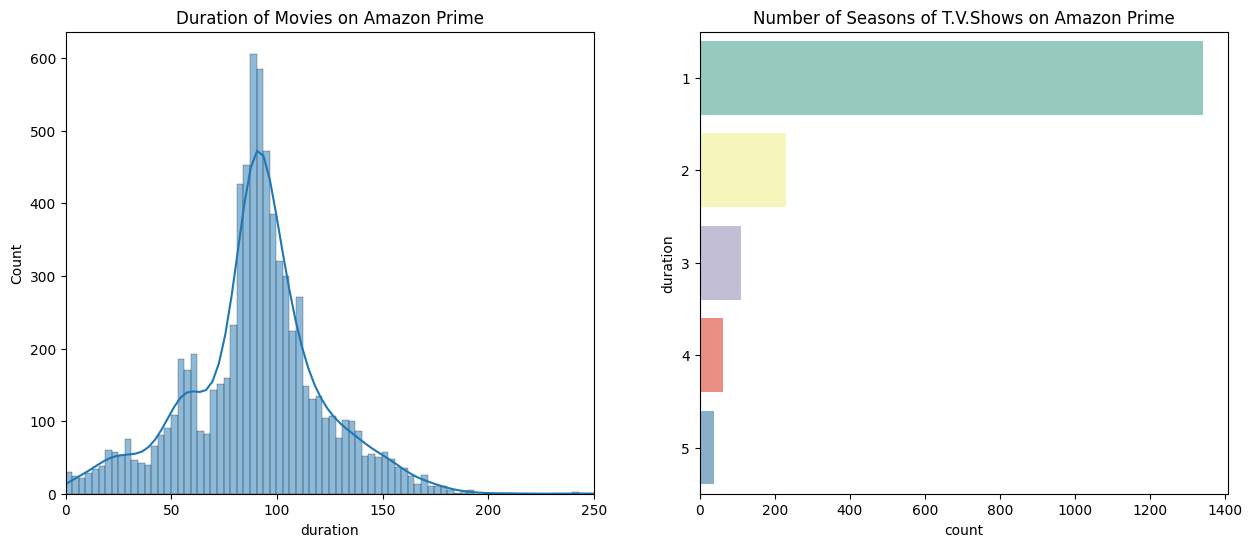

In [34]:
f,x=plt.subplots(1,2,figsize=(15,6))
f1=sns.histplot(data=movies_df.duration,ax=x[0],kde=True);
f1.set(xticks=np.arange(0,400,50));
f1.set_xlim(0,250)
f1.set_title('Duration of Movies on Amazon Prime')
f2=sns.countplot(y='duration',data=show_df,order=show_df.duration.value_counts().index[:5],palette="Set3",ax=x[1])
f2.set_title("Number of Seasons of T.V.Shows on Amazon Prime")

matplotlib.axes._base._AxesBase.ArtistList

Thus we come to conclusion 